In [3]:
#primul bloc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
print(sys.executable)

C:\Users\ovidiu.bica\Anaconda3\envs\ml_env\python.exe


In [4]:
#Încarcă datele:
df = pd.read_csv("../data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#ETAPA 3 – Înțelegerea datelor (EDA)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Apoi verifică valori lipsă:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#curatare date; Eliminăm coloane inutile:
df = df.drop(["Cabin", "Ticket", "Name", "PassengerId"], axis=1)

In [9]:
#Completăm Age cu mediană
#df["Age"].fillna(df["Age"].median(), inplace=True)
df["Age"] = df["Age"].fillna(df["Age"].median())

In [11]:
#Completăm Embarked
#df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [12]:
#ETAPA 5 – Transformări
#Sex → numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [13]:
#One-hot pentru Embarked
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

In [14]:
#ETAPA 6 – Feature Engineering simplu
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

In [15]:
#ETAPA 7 – Separare X și y
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [16]:
#ETAPA 8 – Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [17]:
#ETAPA 9 – Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
#ETAPA 10 – Model Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2
)

Epoch 1/100


C:\Users\ovidiu.bica\Anaconda3\envs\ml_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5817 - loss: 0.6992 - val_accuracy: 0.7622 - val_loss: 0.6302
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6485 - loss: 0.6549 - val_accuracy: 0.8112 - val_loss: 0.5838
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6977 - loss: 0.6139 - val_accuracy: 0.8112 - val_loss: 0.5413
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7487 - loss: 0.5702 - val_accuracy: 0.8112 - val_loss: 0.5070
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7417 - loss: 0.5550 - val_accuracy: 0.8112 - val_loss: 0.4816
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7540 - loss: 0.5435 - val_accuracy: 0.8042 - val_loss: 0.4605
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7610 - loss: 0.5148 - val_accuracy: 0.8042 - val_loss: 0.4450
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7610 - loss: 0.5279 - val_accuracy: 0.8252 - val_loss: 0.4

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8172 - loss: 0.4308 - val_accuracy: 0.8252 - val_loss: 0.3958
Epoch 52/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8207 - loss: 0.4231 - val_accuracy: 0.8182 - val_loss: 0.3974
Epoch 53/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8102 - loss: 0.4387 - val_accuracy: 0.8392 - val_loss: 0.3923
Epoch 54/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8295 - loss: 0.4335 - val_accuracy: 0.8462 - val_loss: 0.3961
Epoch 55/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8278 - loss: 0.4256 - val_accuracy: 0.8392 - val_loss: 0.3969
Epoch 56/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8207 - loss: 0.4350 - val_accuracy: 0.8322 - val_loss: 0.3970
Epoch 57/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8120 - loss: 0.4294 - val_accuracy: 0.8252 - val_loss: 0.3938
Epoch 58/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.4288 - val_accuracy: 0.8252 - val_lo

In [20]:
#ETAPA 11 – Evaluare
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8212 - loss: 0.4194 
Test Accuracy: 0.8212290406227112


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


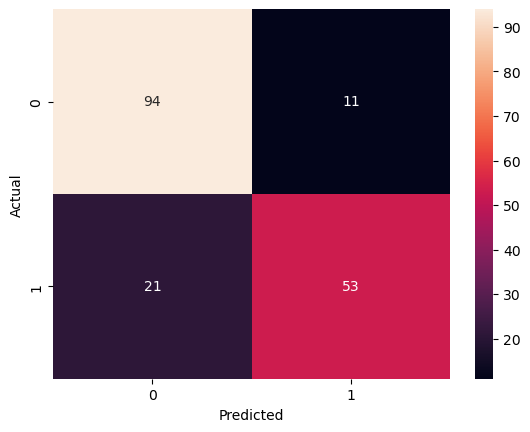

In [21]:
#ETAPA 12 – Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
#ETAPA 13 – Salvare model
#model.save("../model.h5")
model.save("../model.keras")

In [25]:
#ETAPA 14 – requirements.txt
#pip freeze > requirements.txt
# ! spune Jupyter că e o comandă de shell, nu cod Python
!pip freeze > requirements.txt

In [ ]:
#ETAPA 15 – README.md
# Titanic Survival Prediction

End-to-end Machine Learning project using Neural Networks.

## Dataset
Kaggle Titanic Competition

## Pipeline
- Data Cleaning
- Feature Engineering
- Scaling
- Neural Network
- Evaluation

## Results
Test Accuracy: ~80%